# Проектная работа "Анализ бизнес-показателей"


Маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

## Загрузка данных и подготовка их к анализу

In [1]:
#загружаем библиотеки
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('C:\Python\datasets/visits_info_short.csv')
    orders = pd.read_csv('C:\Python\datasets/orders_info_short.csv')
    costs = pd.read_csv('C:\Python\datasets/costs_info_short.csv')

### Ознакомление с данными

In [3]:
display(visits.head())
display(orders.head())
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
visits.duplicated().sum()

0

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
orders.duplicated().sum()

0

In [8]:
orders.describe()

,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


Большинство заказов на 4.99$, однако иногда встречаются отдельные крупные заказы, вплоть до  49.99$

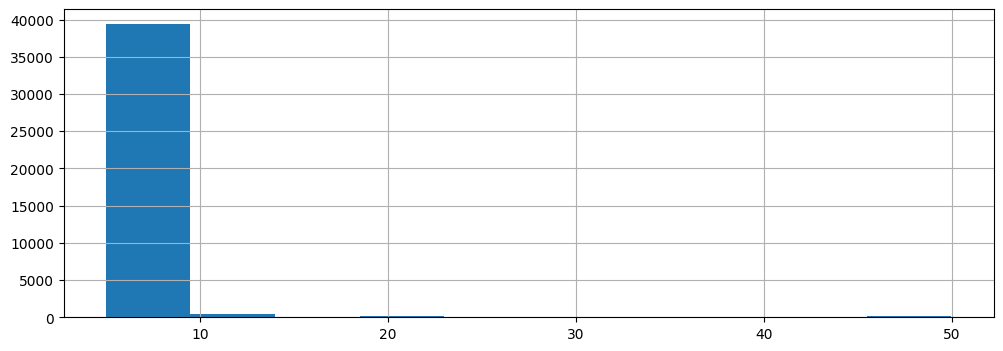

In [9]:
orders['Revenue'].hist(figsize = (12,4));

In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [11]:
costs.duplicated().sum()

0

In [12]:
costs.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


Затраты на рекламу в большинсве случаев укладываются в 34$, однако есть выбивающиеся значение в 630$. Нужно проверить с чем это связано и на какой канал привлечения такой бюджет

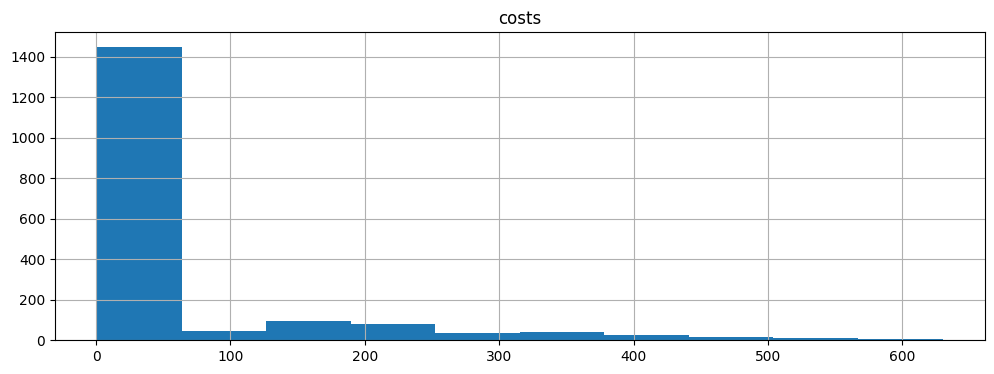

In [13]:
costs.hist(figsize = (12,4));

**Вывод:** В таблицах явных дубликатов не найдено. так же отсутствуют пропуски. Нужно привести дату к правильному типу. А так же для удобства привести все названия столбцов к строчному написанию.

### Предобработка данных


#### Таблица с посещениями

In [14]:
#приводим названия столбцов
visits.columns = visits.columns.str.lower()
visits.rename({'user id' : 'user_id', 'session start' : 'session_start', 'session end' : 'session_end'}, axis=1, inplace=True)

In [15]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [16]:
#приводим дату к нужному типу
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [17]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [18]:
# проверяем на ошибки во времени сессий. Вдруг старт сесии позже ее конца?
visits[visits.session_start > visits.session_end].count()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Строк с ошибками в длительности сессии не найдено

#### Таблица с заказами

In [19]:
#приводим названия столбцов
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [20]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [21]:
orders['event_dt'] = pd.to_datetime(orders['event_dt']) #приводим дату к нужному типу

In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


#### Таблица с затратами на рекламу

In [23]:
#приводим названия столбцов
costs.columns = costs.columns.str.lower()

In [24]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [25]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [26]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


### Вывод по обзору и предобработке данных

- Данные чистые, пропусков и дубликатов нет
- Ошибки в данных отсутстуют (нет отрицательных значений, где их быть не может; старт сессии всегда раньше ее окончания). Данные собраны корректно
- Типы данных приведены к нужным.
- Для удобства чтения названия стобцов приведены к строчному написанию

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

In [27]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [28]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [29]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [30]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [31]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [32]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [33]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [34]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Профили пользователей. Минимальная и максимальная даты привлечения пользователей.

In [35]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [36]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

In [37]:
print(f'Минимальная дата {min_date}')
print(f'Максимальная дата {max_date}')

Минимальная дата 2019-05-01
Максимальная дата 2019-10-27


Имеем данные почти за 6 месяцев - с мая по конец октября, что соответсвует указанным в задании

###  Анализ пользователей по странам
Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [38]:
# все условия в заданиии похожи, зададим функцию для сводной таблицы
def share(index):
    share = profiles.pivot_table(
    index=index, columns = 'payer', values = 'user_id', aggfunc = ['nunique']).reset_index()
    share.columns = [index, 'unpayer', 'payer']
    share['all'] = share['unpayer'] + share['payer']
    share['%_payer'] = ((share['payer']/share['all'])*100).round(2)
    return share

In [39]:
share_by_country = share('region')
share_by_country

,region,unpayer,payer,all,%_payer
0,France,16787,663,17450,3.80
1,Germany,14365,616,14981,4.11
2,UK,16875,700,17575,3.98
3,United States,93100,6902,100002,6.90


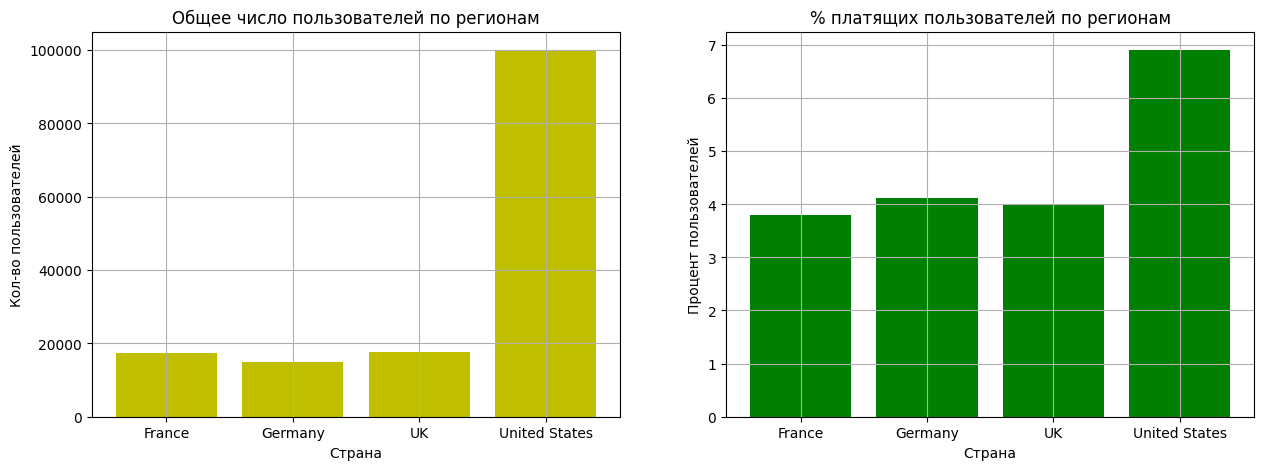

In [40]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax0.grid(True)
ax0.set_title('Общее число пользователей по регионам')
ax0.bar(share_by_country['region'], share_by_country['all'], color='y')
ax0.set_xlabel('Страна')
ax0.set_ylabel('Кол-во пользователей')
ax1.grid(True)
ax1.set_title('% платящих пользователей по регионам')
ax1.bar(share_by_country['region'], share_by_country['%_payer'], color='g')
ax1.set_xlabel('Страна')
ax1.set_ylabel('Процент пользователей');

**Вывод:** У нас присутствуют пользователи из 4х стран: Франция, Германия, Великобритания и США. Общее количество пользователей в США гораздо больше, чем в других странах (почти в 6 раз по сравнению с каждой). Процент платящих пользователей так же больше всего в США - 6,9% от общего числа. 

### Анализ пользователей по устройствам
Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [41]:
share_by_device = share('device')
share_by_device

,device,unpayer,payer,all,%_payer
0,Android,32982,2050,35032,5.85
1,Mac,28130,1912,30042,6.36
2,PC,28918,1537,30455,5.05
3,iPhone,51097,3382,54479,6.21


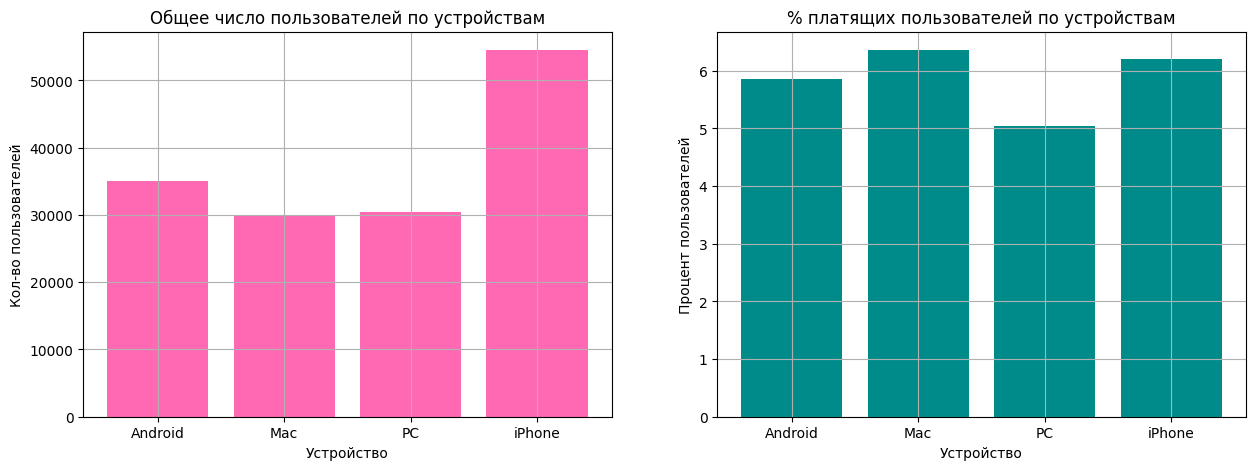

In [42]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax0.grid(True)
ax0.set_title('Общее число пользователей по устройствам')
ax0.bar(share_by_device['device'], share_by_device['all'], color='hotpink')
ax0.set_xlabel('Устройство')
ax0.set_ylabel('Кол-во пользователей')
ax1.grid(True)
ax1.set_title('% платящих пользователей по устройствам')
ax1.bar(share_by_device['device'], share_by_device['%_payer'], color='darkcyan')
ax1.set_xlabel('Устройство')
ax1.set_ylabel('Процент пользователей');

**Вывод:** Большинсво клиентов пользуются айфонами, однако процент платящих пользователей примерно одинаковый на всех типах устройств. Но все же чуть выше он у владельцев "яблок" - айфонов и маков и составляет чуть больше 6%. На PC платят хуже всего.

### Анализ каналов привлечения
Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [43]:
share_by_channel = share('channel')
share_by_channel

,channel,unpayer,payer,all,%_payer
0,AdNonSense,3440,440,3880,11.34
1,FaceBoom,25587,3557,29144,12.20
2,LeapBob,8291,262,8553,3.06
3,MediaTornado,4208,156,4364,3.57
4,OppleCreativeMedia,8372,233,8605,2.71
5,RocketSuperAds,4096,352,4448,7.91
6,TipTop,17683,1878,19561,9.60
7,WahooNetBanner,8100,453,8553,5.30
8,YRabbit,4147,165,4312,3.83
9,lambdaMediaAds,1924,225,2149,10.47


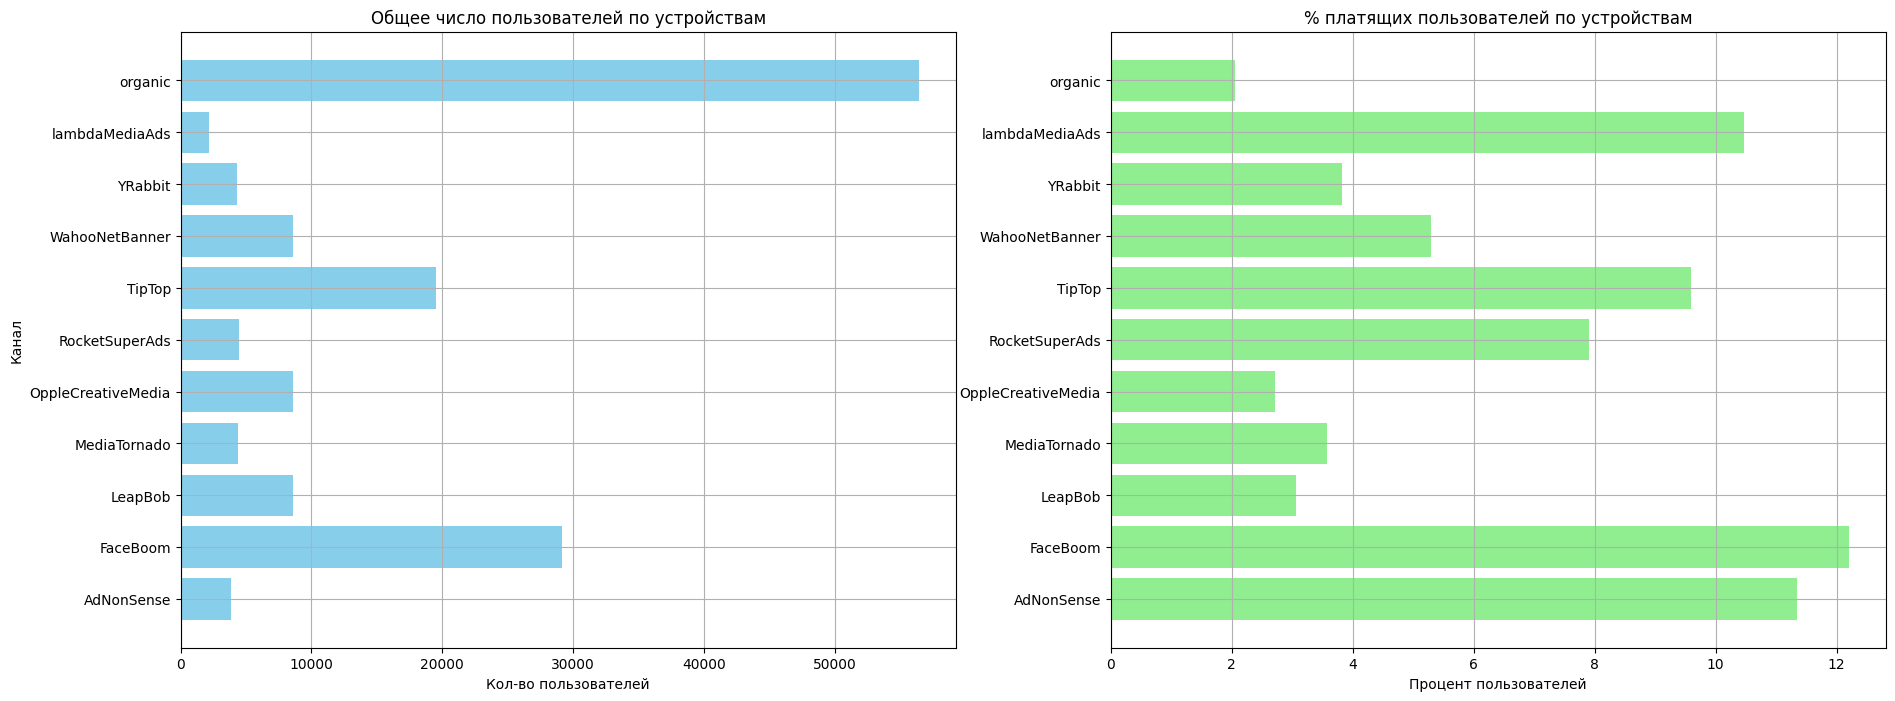

In [44]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(22,8))
ax0.grid(True)
ax0.set_title('Общее число пользователей по устройствам')
ax0.barh(share_by_channel['channel'], share_by_channel['all'], color='skyblue')
ax0.set_xlabel('Кол-во пользователей')
ax0.set_ylabel('Канал')
ax1.grid(True)
ax1.set_title('% платящих пользователей по устройствам')
ax1.barh(share_by_channel['channel'], share_by_channel['%_payer'], color='lightgreen')
ax1.set_xlabel('Процент пользователей');

**Вывод:** Больше всего пользователей приходит с органики, однако процент платящих там самый низкий. Лучше всего себя показывают:
- FaceBoom - второе место по общему числу привлеченных пользователей и первое по проценту платящих среди них.
- AdNoneSense и LambdaMediaAds - процент платящих пользователей тут тоже достаточно высок - больше 10%. Однако общее число привлеченных пользователей на этих каналах очень маленькое.
- TipTop тоже неплохие показатели - на третьем месте по общему числу привлеченных пользователей, из которых почти 10% платят.

### Общий вывод по исследовательскому анализу

В анализируемых данных за 6 месяцев (с мая по октябрь 2019 года):
- Присутствуют пользователи из 4х стран: Франция, Германия, Великобритания и США. Общее количество пользователей в США гораздо больше, чем в других странах (почти в 6 раз по сравнению с каждой). Процент платящих пользователей так же больше всего в США - 6,9% от общего числа.
- Большинсво клиентов пользуются айфонами, однако процент платящих пользователей примерно одинаковый на всех типах устройств. Но все же чуть выше он у владельцев "яблок" - айфонов и маков и составляет чуть больше 6%. На PC платят хуже всего.
- Больше всего пользователей приходит с органики, однако процент платящих там самый низкий. Из платных каналов по числу пользовтелей лидирует FaceBoom. TipTop на третьем месте по общему числу привлеченных пользователей, из которых почти 10% платят.

Таким образом большая часть наших пользователей - это Американцы. Лучше всего платят владельцы техники Apple. 
Каналы привлечения и их эффективность будем анализировать детальнее далее.

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [45]:
costs.sample(5)

,dt,channel,costs
13,2019-05-14,FaceBoom,92.4
1593,2019-10-01,WahooNetBanner,45.6
1783,2019-10-11,lambdaMediaAds,4.0
916,2019-05-17,AdNonSense,35.7
737,2019-05-18,YRabbit,11.1


### Посчитайте общую сумму расходов на маркетинг.

In [46]:
#считаем общую сумму расходов на рекламу
sum_costs = costs['costs'].sum().round(2)
sum_costs

105497.3

За 6 месяцев на привлечение потратили почти 106 000.

### Расчет трат по рекламным источникам
Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [47]:
channel_costs = costs.groupby('channel')['costs'].sum().sort_values().reset_index()
channel_costs

,channel,costs
0,YRabbit,944.22
1,MediaTornado,954.48
2,lambdaMediaAds,1557.60
3,LeapBob,1797.60
4,RocketSuperAds,1833.00
5,OppleCreativeMedia,2151.25
6,AdNonSense,3911.25
7,WahooNetBanner,5151.00
8,FaceBoom,32445.60
9,TipTop,54751.30


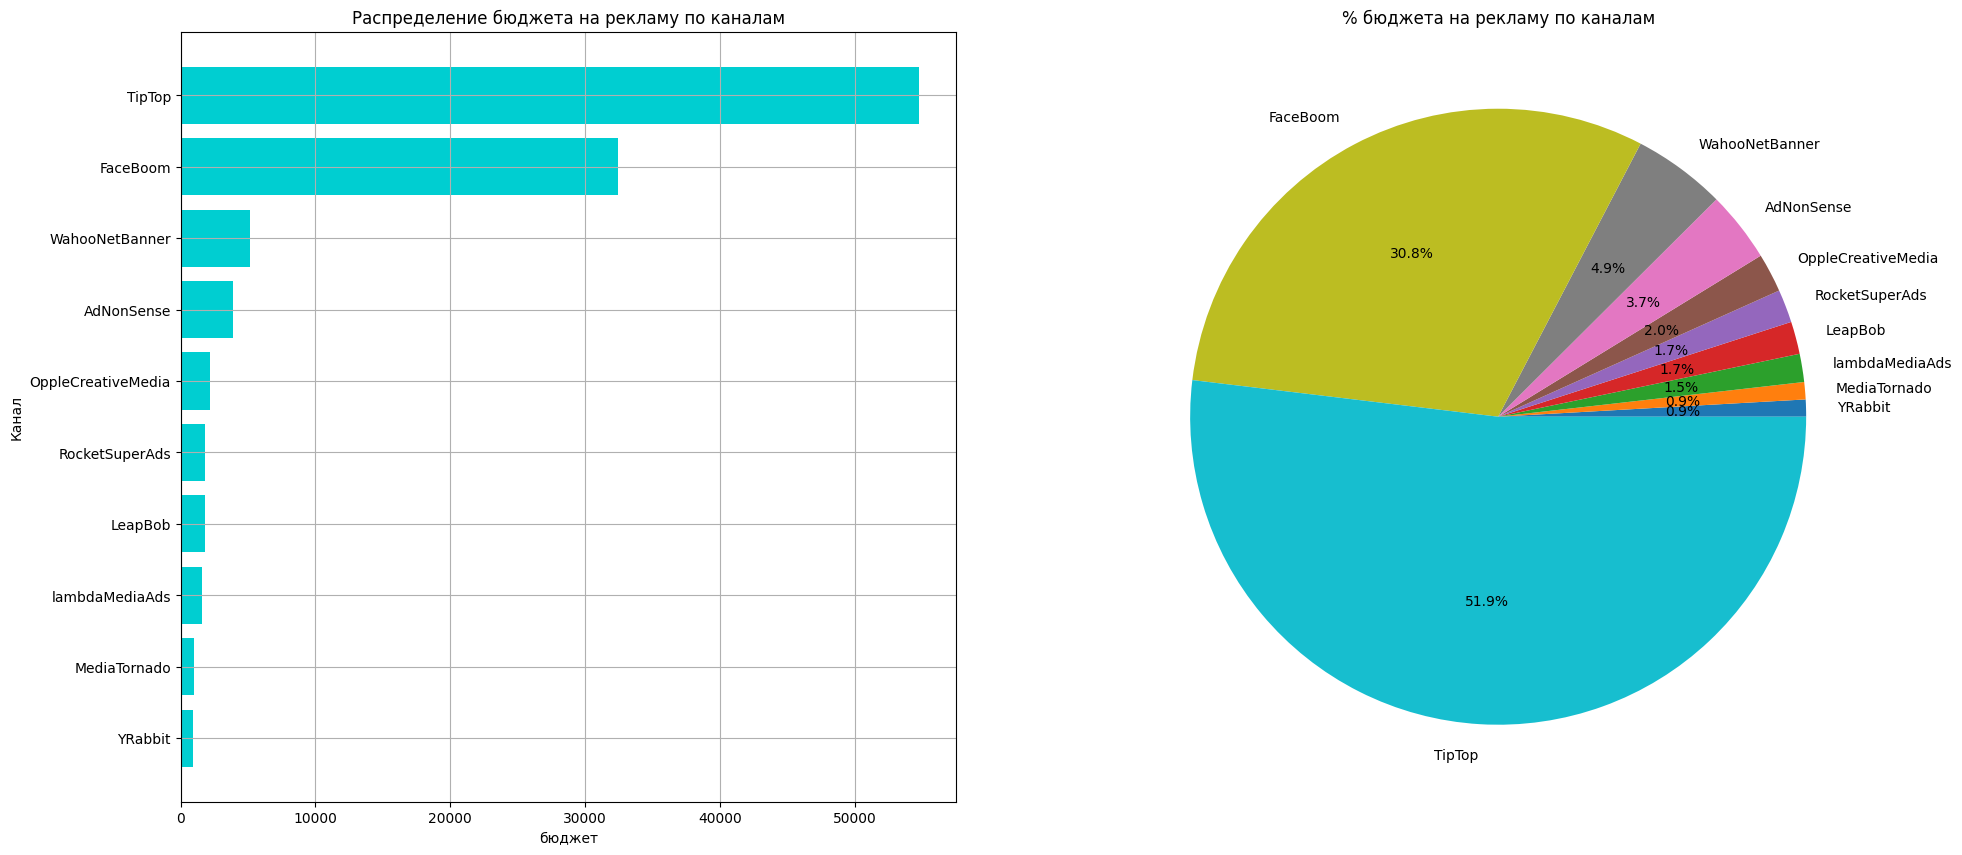

In [48]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(22,10))
ax0.grid(True)
ax0.set_title('Распределение бюджета на рекламу по каналам')
ax0.barh(channel_costs['channel'], channel_costs['costs'], color='darkturquoise')
ax0.set_xlabel('бюджет')
ax0.set_ylabel('Канал')
ax1.grid(True)
ax1.set_title('% бюджета на рекламу по каналам')
ax1.pie(channel_costs['costs'], autopct='%1.1f%%', labels=channel_costs['channel']);

**Вывод:** Большая часть бюджета уходит на TipTop и FaceBoom (больше 80% только на эти 2 канала). 
По количеству привлеченных пользователей у нас лидировал FaceBoom. Так же именно там самая качественная аудитория (самый высокий процент платящих). Однако основная часть бюджета уходит в TipTop. Проверим дальше

### Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

In [49]:
costs_history = costs.pivot_table(index = 'dt', columns = 'channel', values = 'costs', aggfunc = 'sum').reset_index()
costs_history.sample(5)

channel,dt,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
173,2019-10-21,11.55,201.3,7.56,6.24,14.00,11.050,518.0,37.2,4.32,7.2
78,2019-07-18,19.95,108.9,7.56,2.40,11.00,2.730,213.2,21.0,1.98,5.6
58,2019-06-28,18.90,235.4,14.07,6.96,18.50,10.465,405.6,39.0,4.14,8.8
84,2019-07-24,11.55,128.7,7.56,2.88,11.75,7.280,208.0,19.8,2.16,6.4
51,2019-06-21,19.95,174.9,13.23,4.08,13.25,10.530,203.3,31.2,3.60,4.8


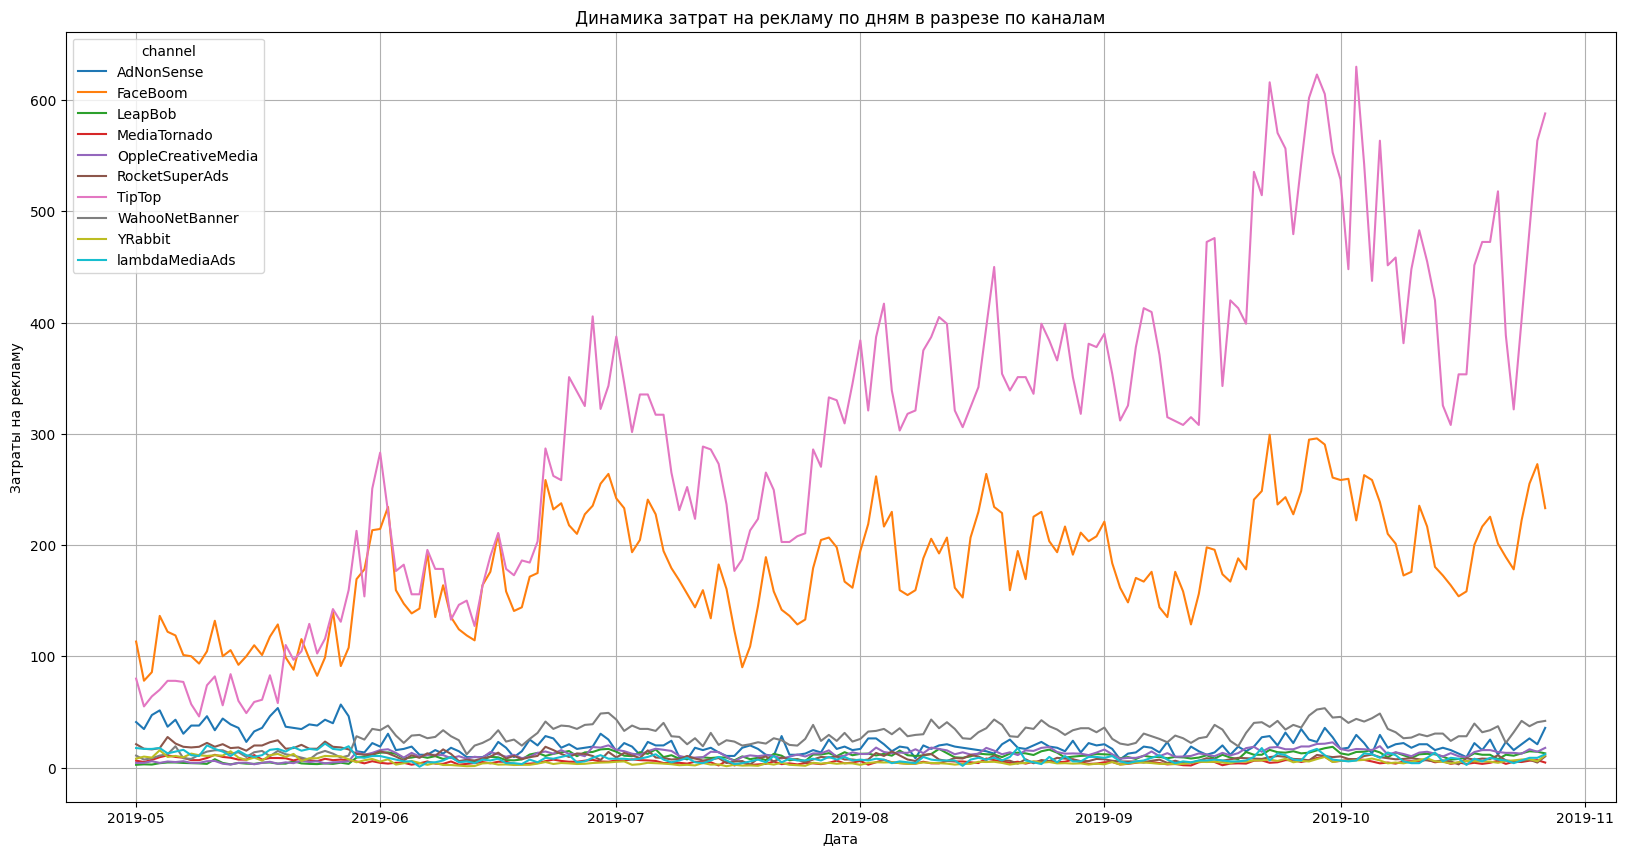

In [50]:
costs_history.plot(x = 'dt',figsize=(20,10), grid=True)
plt.title('Динамика затрат на рекламу по дням в разрезе по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты на рекламу');

In [51]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

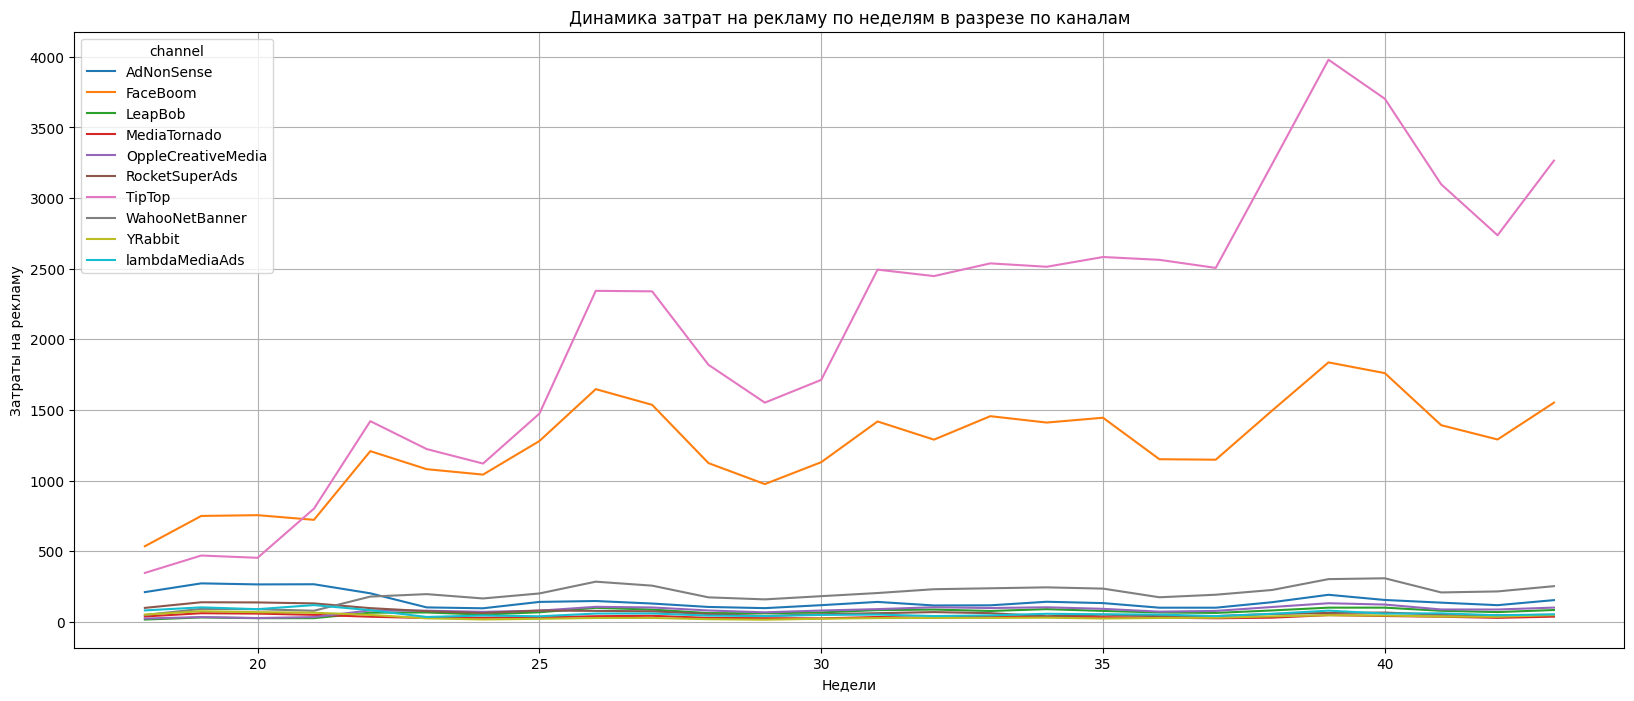

In [52]:
costs_per_week = costs.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum').reset_index()
costs_per_week.plot(x = 'week',figsize=(20,8), grid=True)
plt.title('Динамика затрат на рекламу по неделям в разрезе по каналам')
plt.xlabel('Недели')
plt.ylabel('Затраты на рекламу');

In [53]:
costs_per_week

channel,week,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
0,18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.20,81.6
1,19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.90,103.2
2,20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.30,90.4
3,21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.40,119.2
4,22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.80,83.2
5,23,102.90,1081.3,66.99,27.60,79.50,76.050,1223.6,196.8,25.80,35.2
6,24,96.60,1042.8,52.29,29.76,71.50,63.180,1121.0,166.2,17.46,45.6
7,25,141.75,1280.4,68.46,32.16,79.75,80.730,1474.4,201.6,22.14,40.0
8,26,148.05,1647.8,99.75,40.56,107.00,78.260,2343.6,285.0,27.90,59.2
9,27,130.20,1536.7,87.36,43.44,102.50,75.075,2340.0,256.8,28.26,60.0


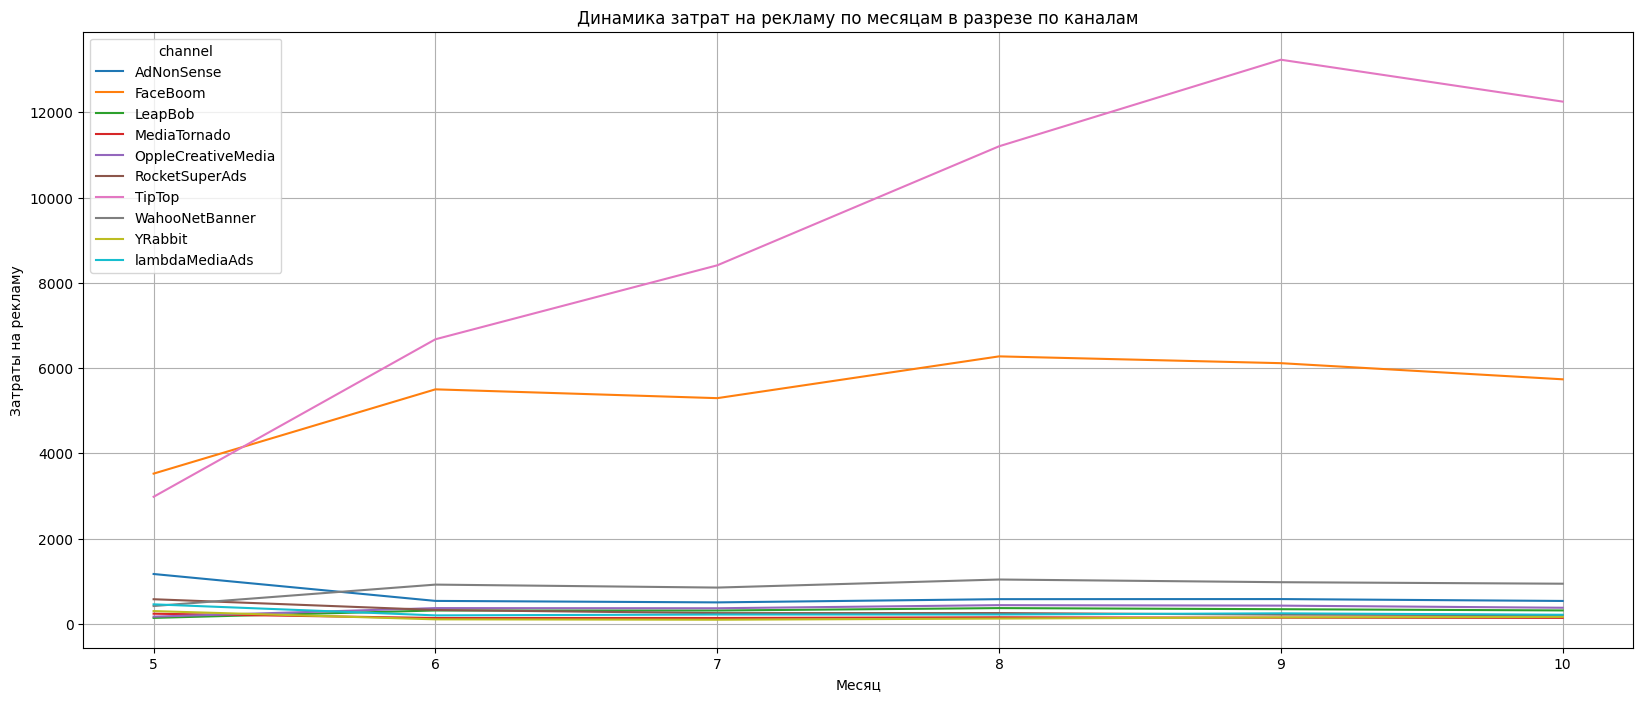

In [54]:
costs_per_month = costs.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum').reset_index()
costs_per_month.plot(x = 'month',figsize=(20,8), grid=True)
plt.title('Динамика затрат на рекламу по месяцам в разрезе по каналам')
plt.xlabel('Месяц')
plt.ylabel('Затраты на рекламу');

In [55]:
costs_per_month

channel,month,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
0,5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
1,6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
2,7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
3,8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
4,9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2
5,10,537.60,5736.5,315.42,140.16,378.00,205.725,12250.0,942.0,163.41,213.6


**Вывод:** На графиках видно, что затраты на всех каналах, кроме TipTop и FaceBoom держатся примерно на одном уровне (до 1000 в неделю). Затраты на FaceBoom немного увеличили (примерно с 4000 до 6000 в месяц). А вот затраты на TipTop выросли довольно резко и сильно - с 3500 в мае до 13000 в сентябре (данные за октябрь у нас все же не совсем полные, небольшой спад может быть обусловлен именно этим)
Интересно, что несмотря на такие возросшие траты, по кол-ву пользователей TipTop все равно уступает FaceBoom

### Расчет CAC
Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [56]:
cac = profiles.groupby('channel')['acquisition_cost'].mean().round(2)
cac

channel
AdNonSense            1.01
FaceBoom              1.11
LeapBob               0.21
MediaTornado          0.22
OppleCreativeMedia    0.25
RocketSuperAds        0.41
TipTop                2.80
WahooNetBanner        0.60
YRabbit               0.22
lambdaMediaAds        0.72
organic               0.00
Name: acquisition_cost, dtype: float64

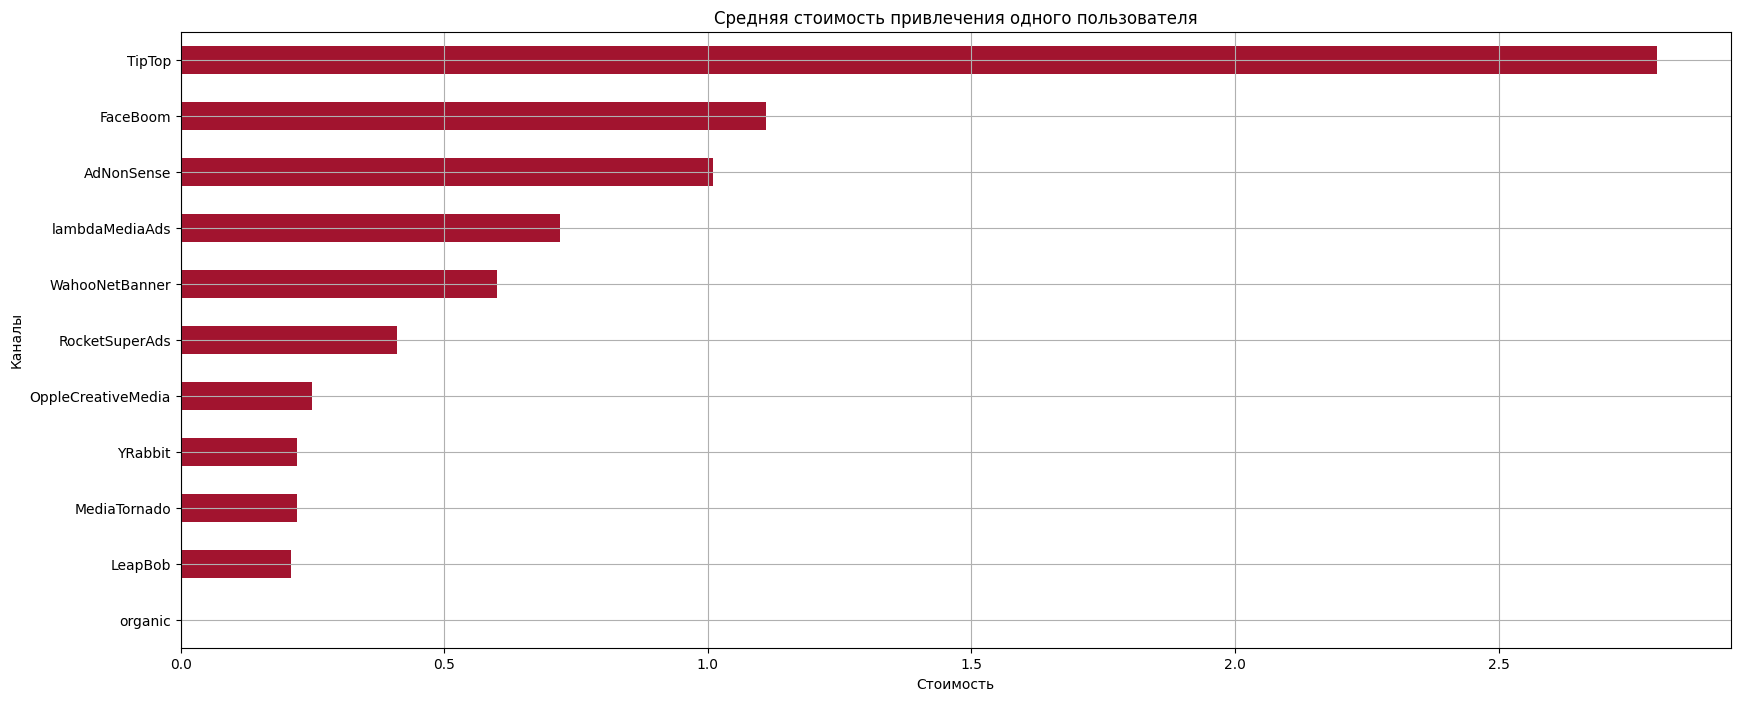

In [57]:
cac.sort_values().plot(kind = 'barh',figsize=(20,8), grid=True, color = '#A2142F')
plt.title('Средняя стоимость привлечения одного пользователя')
plt.xlabel('Стоимость')
plt.ylabel('Каналы');

**Вывод:** Самые дорогие пользователи с канала привелечения TipTop - 2,8 за человека в среднем. Хотя в том же FaceBoom чуть больше 1 за человека. В остальных каналах вообще не превышает 1.

Наиболее дорогостоящим каналом привлечения пользователей является TipTop, однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью.

### Вывод по разделу 

- За 6 месяцев затраты на привлечение составили 105 500.
- Большая часть бюджета ушла на TipTop и FaceBoom (больше 80% только на эти 2 канала).
- Были сильно увеличены затраты TipTop (с 3500 в мае до 13000) и умеренно на FaceBoom (примерно с 4000 до 6000 в месяц).
- Средняя стоимость пользователя с канала привелечения TipTop составила 2,8 за человека. Хотя в остальных каналах она почти не превышает 1.

## Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [58]:
#задаем горизонт аназила и дату наблюдения
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

In [59]:
# сделаем срез и уберем органических пользователей. Т.к. нам интересны показатели именно платных, 
# чтобы оценить окупаемоть рекламы
# Дальше будем работать с этими данными
paid_profiles =  profiles.query('channel != "organic"')

In [60]:
result_raw, ltv, ltv_history, roi, roi_history = (
    get_ltv(paid_profiles, orders, observation_date, horizon_days))

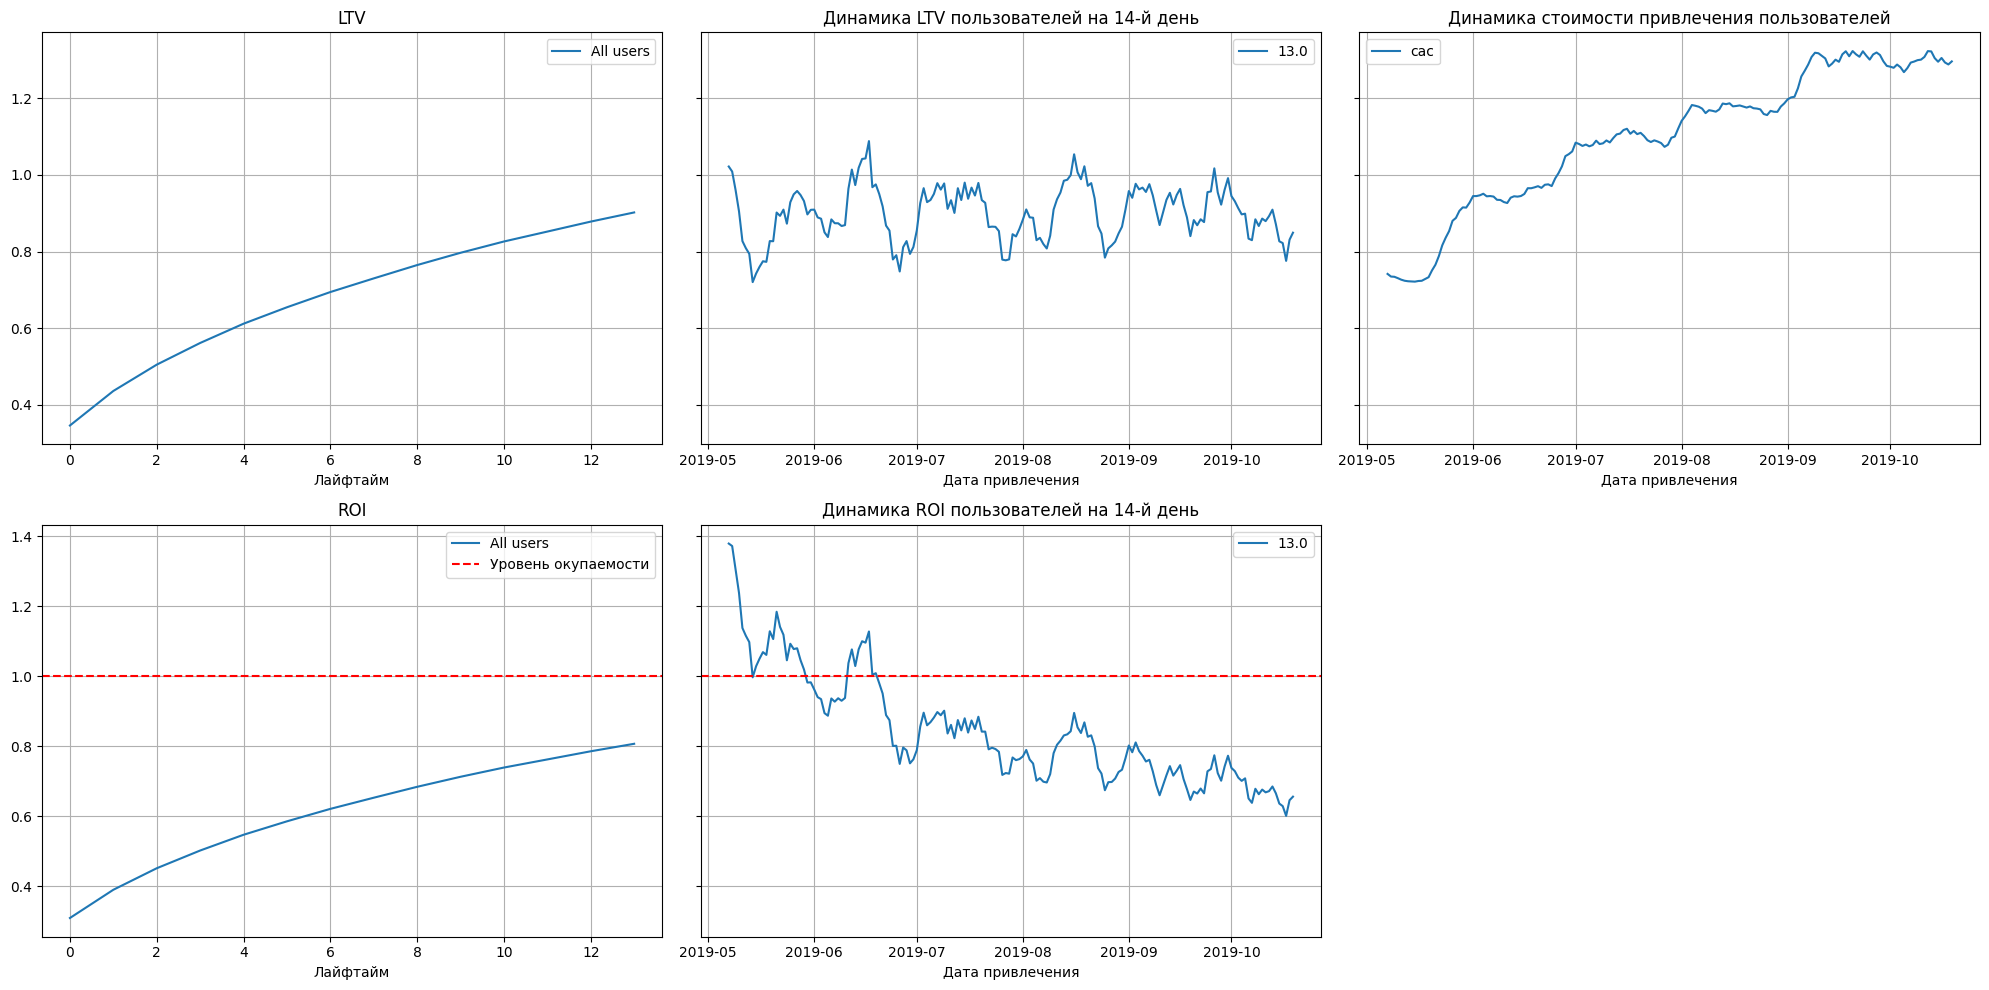

In [61]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

**Выводы:** 
- LTV растет, значит верно учтен горизонт анализа и все пользователи успели его прожить
- LTV колеблется, но держится примерно в одном диапазоне
- Реклама не окупается. ROI в конце недели — чуть выше 80%.
- CAC растет - расходы на рекламу увеличиваются
- ROI 14го дня снижается с каждой следующей когортой. Расхходы на рекламу растут, а пользователи больше денег не приносят

### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

#### Конверсия

In [62]:
conv_raw, conv_grouped, conv_history = get_conversion(paid_profiles, orders, observation_date, horizon_days)

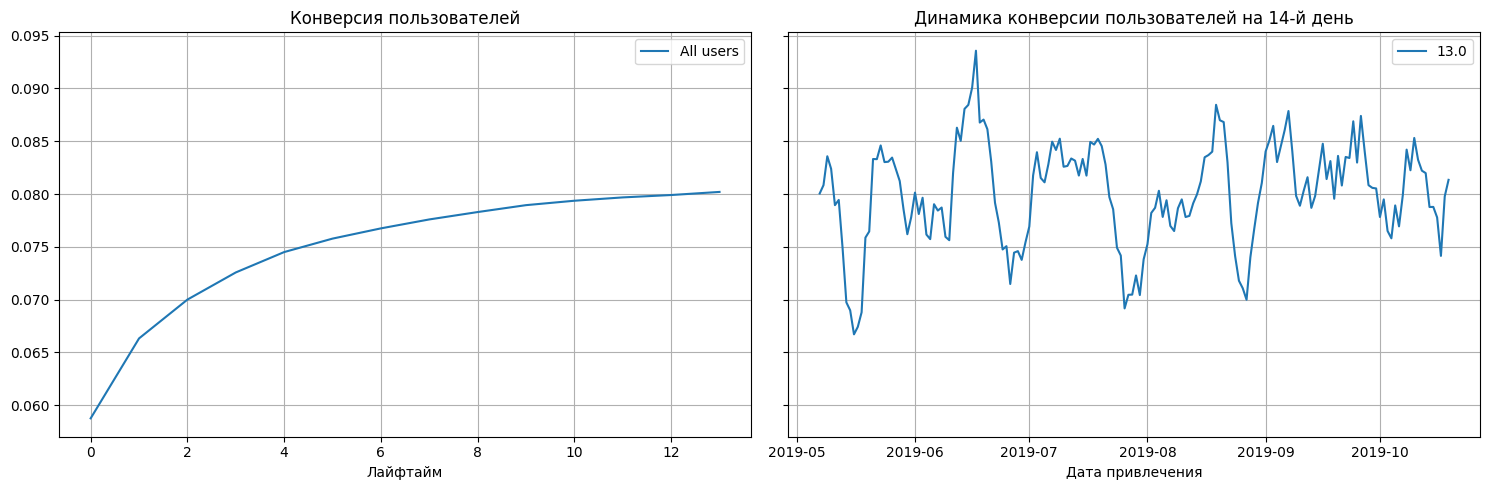

In [63]:
plot_conversion(conv_grouped, conv_history, horizon_days)

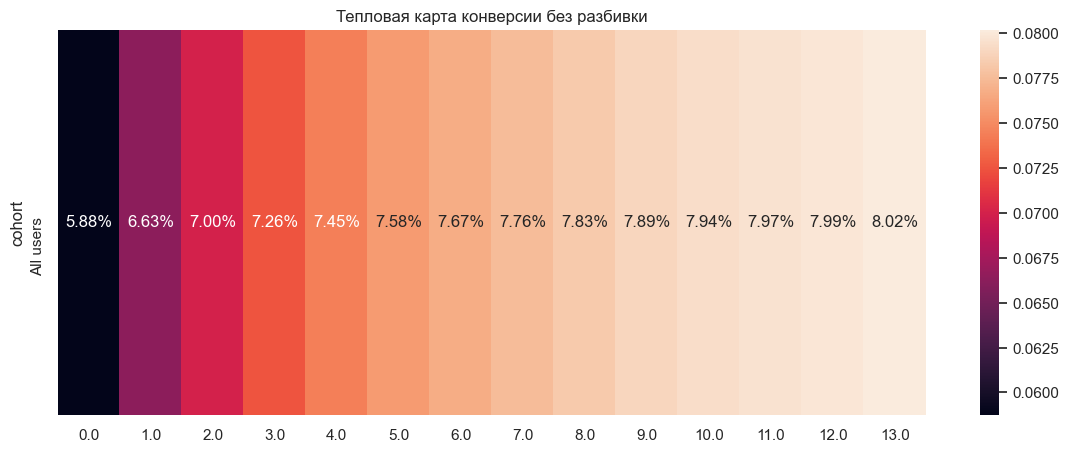

In [68]:
sns.heatmap(conv_grouped.drop(columns=['cohort_size']), annot=True, fmt='.2%')
sns.set(rc = {'figure.figsize':(14,3)})
plt.title('Тепловая карта конверсии без разбивки')
plt.show(); 

**Вывод:**
- Конверсия растет, значит верно учтен горизонт анализа и ошибок в расчетах нет
- Видим рост с 5.88% в первый день жизни до 8% спустя 2 недели.

#### Удержание

In [69]:
retention_raw, retention_grouped, retention_history = get_retention(paid_profiles, visits, observation_date, horizon_days)

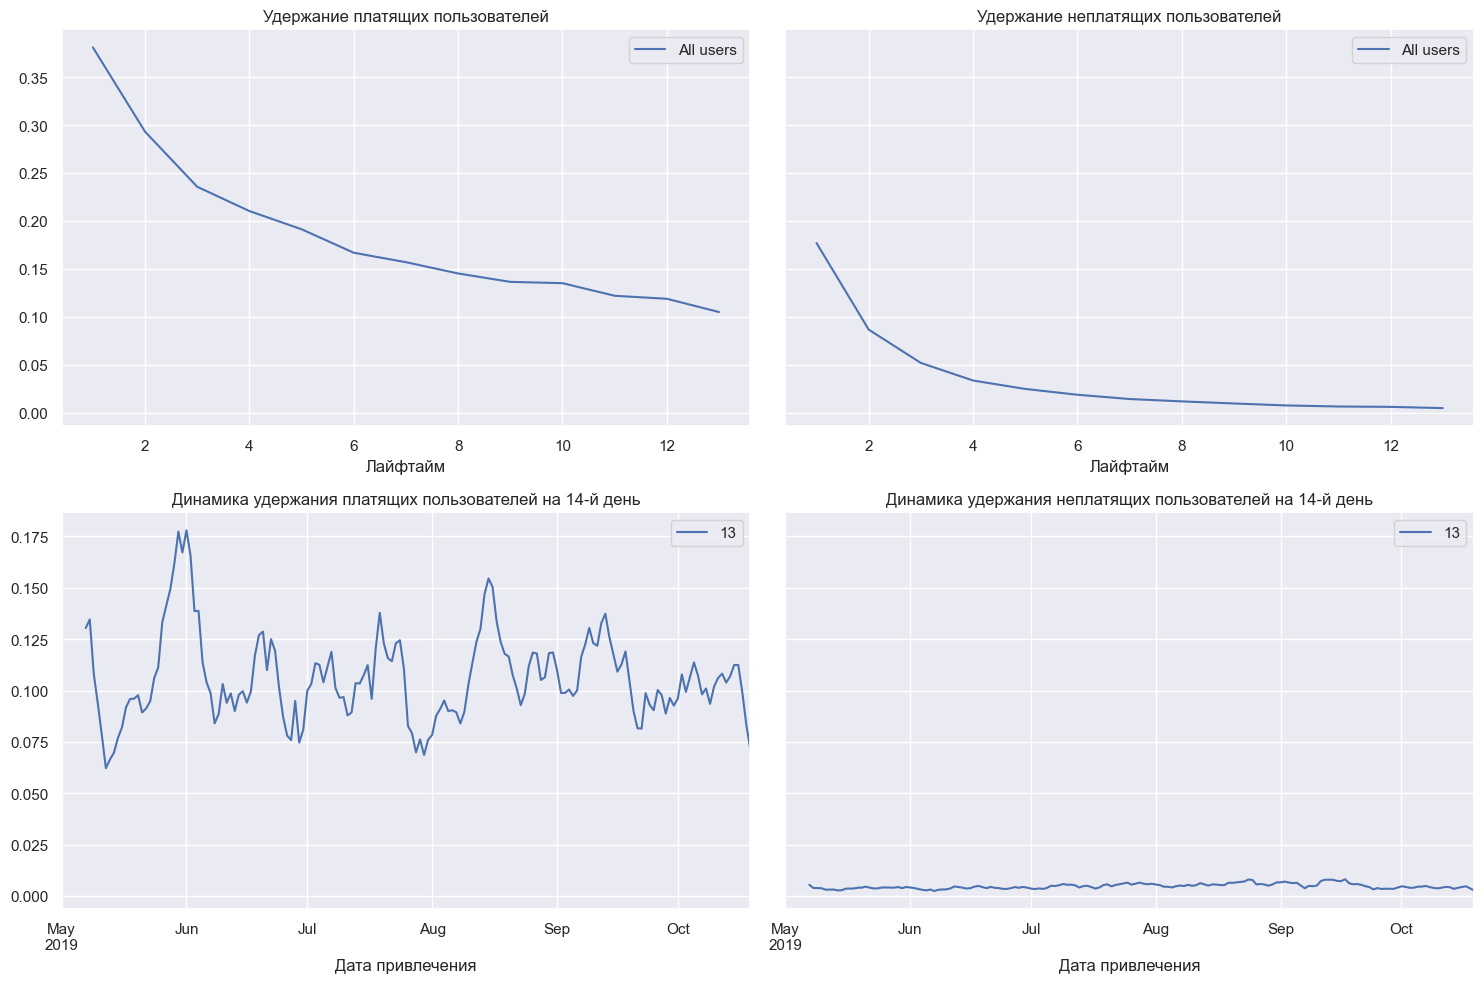

In [70]:
plot_retention(retention_grouped, retention_history, horizon_days) 

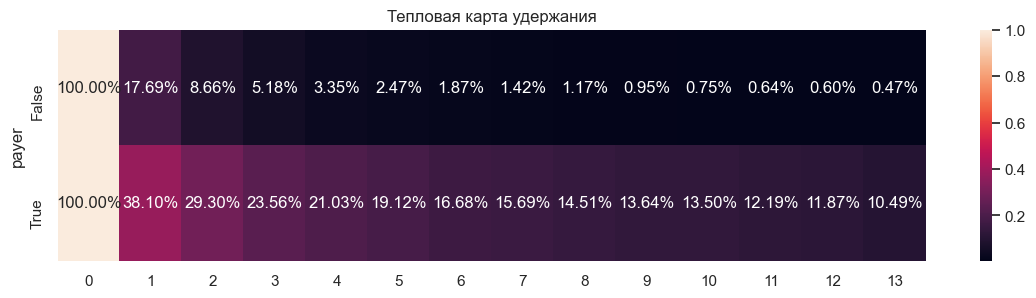

In [71]:
sns.heatmap(retention_grouped.drop(columns=['cohort_size']), annot=True, fmt='.2%')
sns.set(rc = {'figure.figsize':(18,8)})
plt.title('Тепловая карта удержания')
plt.show(); 

**Вывод:**
- Удержание платящих пользователей ожидаемо выше, чем не платящих
- Удержание платящих падает с 38% во второй день до 10.5% к концу второй недели
- Удержание не платящих падает более резко. Уже к концу первой недели остается менее 2% пользователей.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

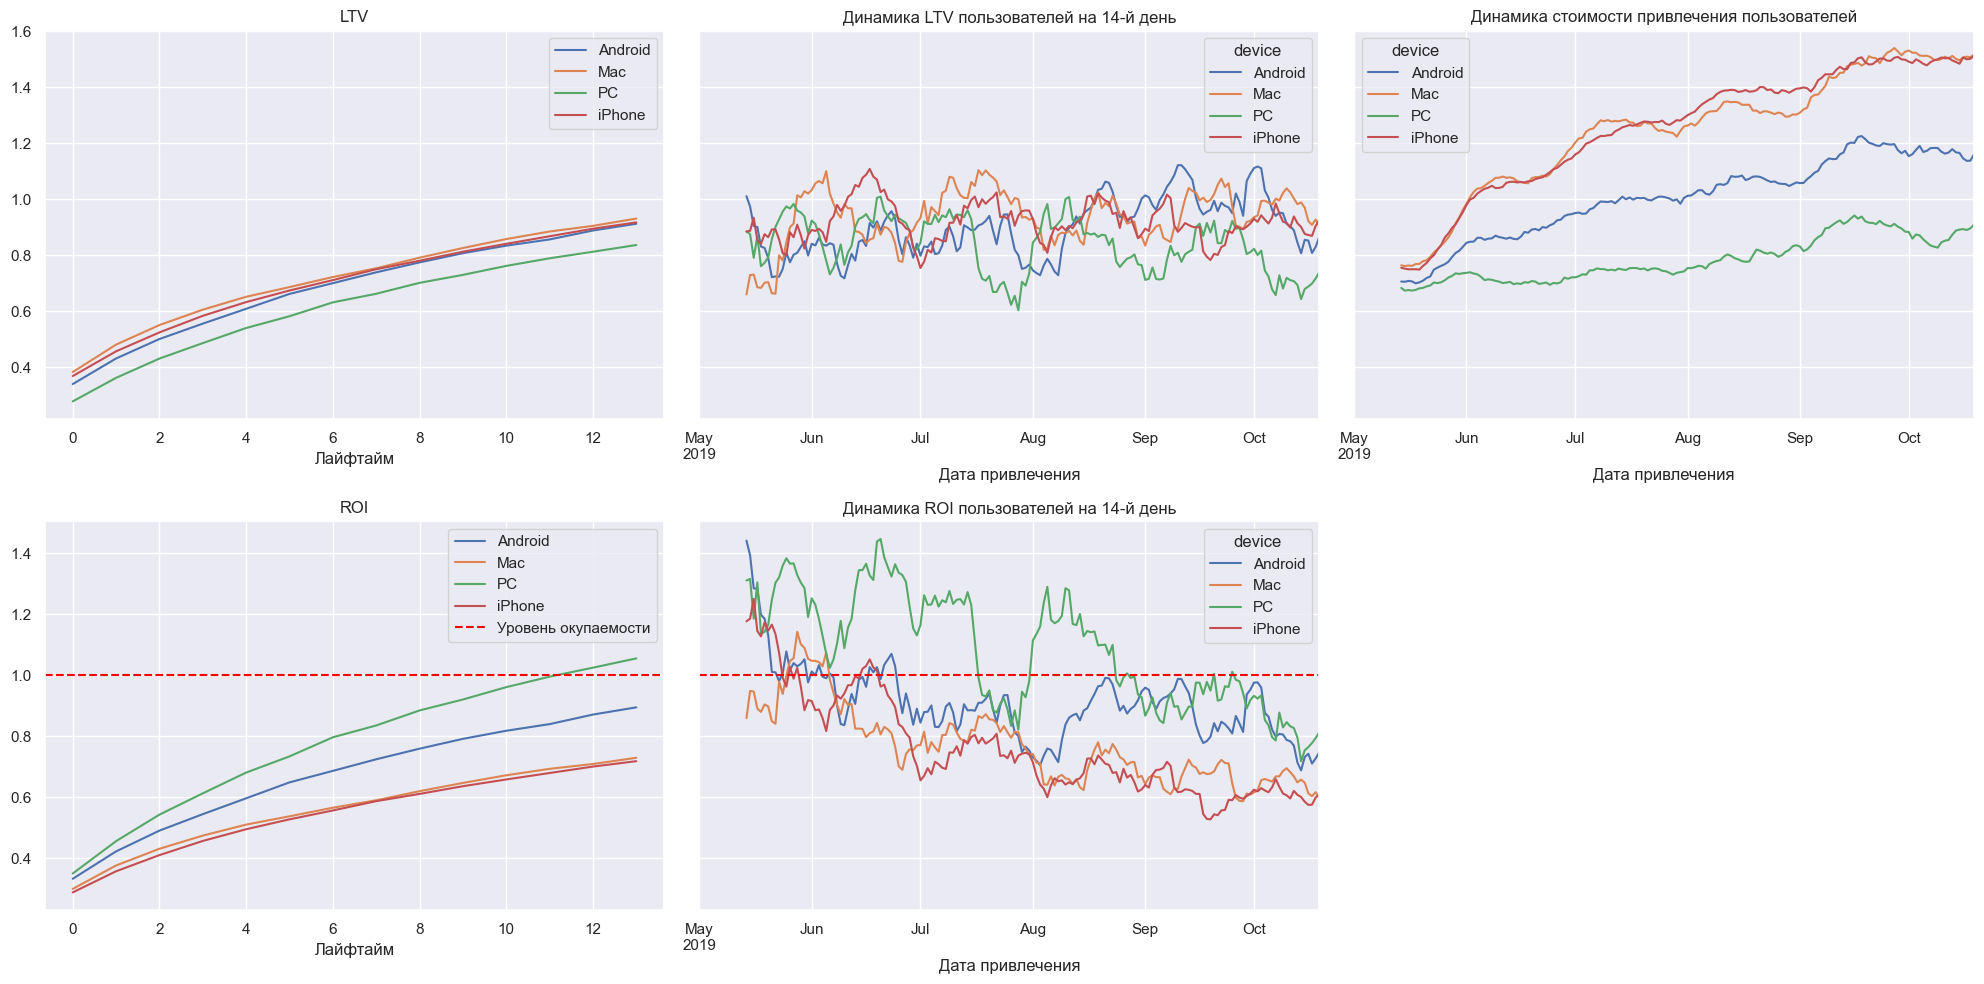

In [72]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**
- Стоимоть привлечения пользователей с "яблоками" (Айфон и Мак) растет больше, чем остальных пользователей
- Реклама окупается только для пользователей с PC. Хуже всего показатели у Айфонов и Макбуков

С окупаемостью проблемы по всем устройствам кроме PC. Это значит, что у нас, по крайней мере, нет технических проблем, влияющих на монетизацию

### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

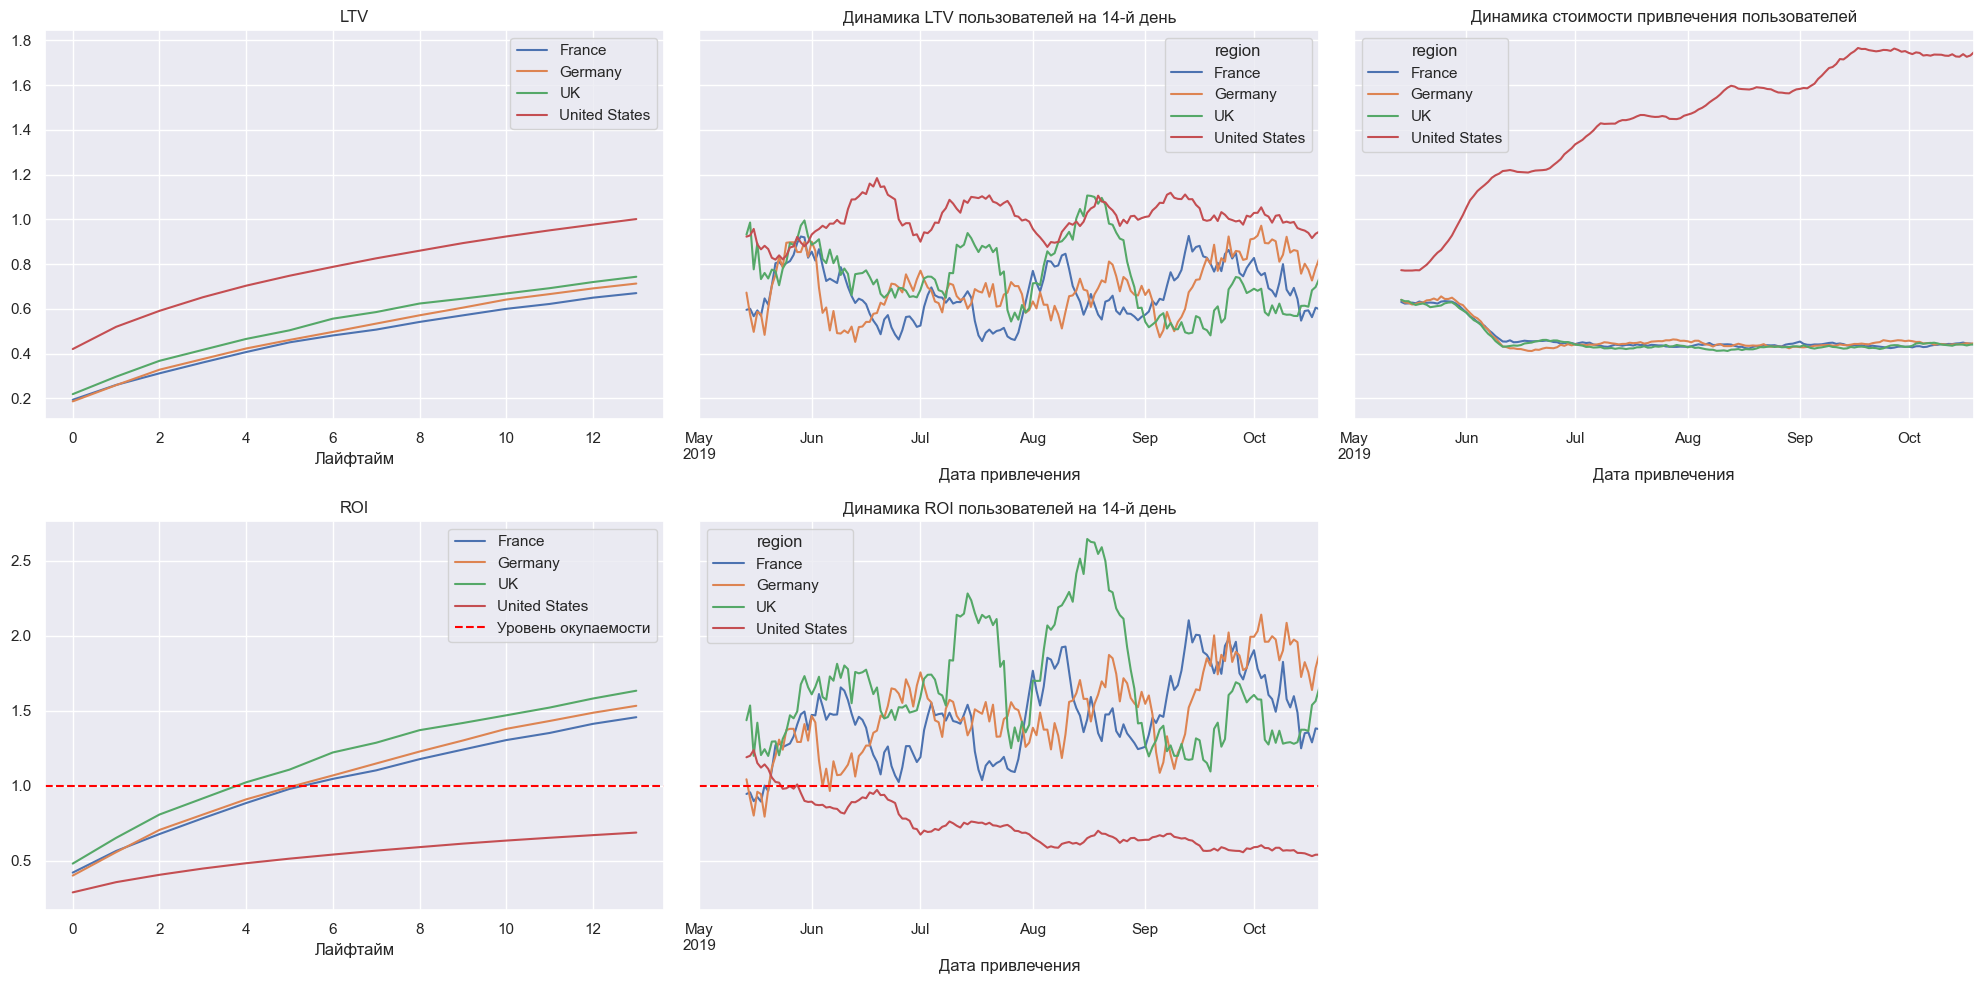

In [73]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**
- LTV пользователей с Америки выше, чем в других странах
- Стоимоть привлечения пользователей с Америки стала резко расти начиная с июня
- Реклама окупается для всех пользователей, кроме Америки. 

Нужно разбираться детальнее с рекламой в США, тем более, что это наш основной рынок.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

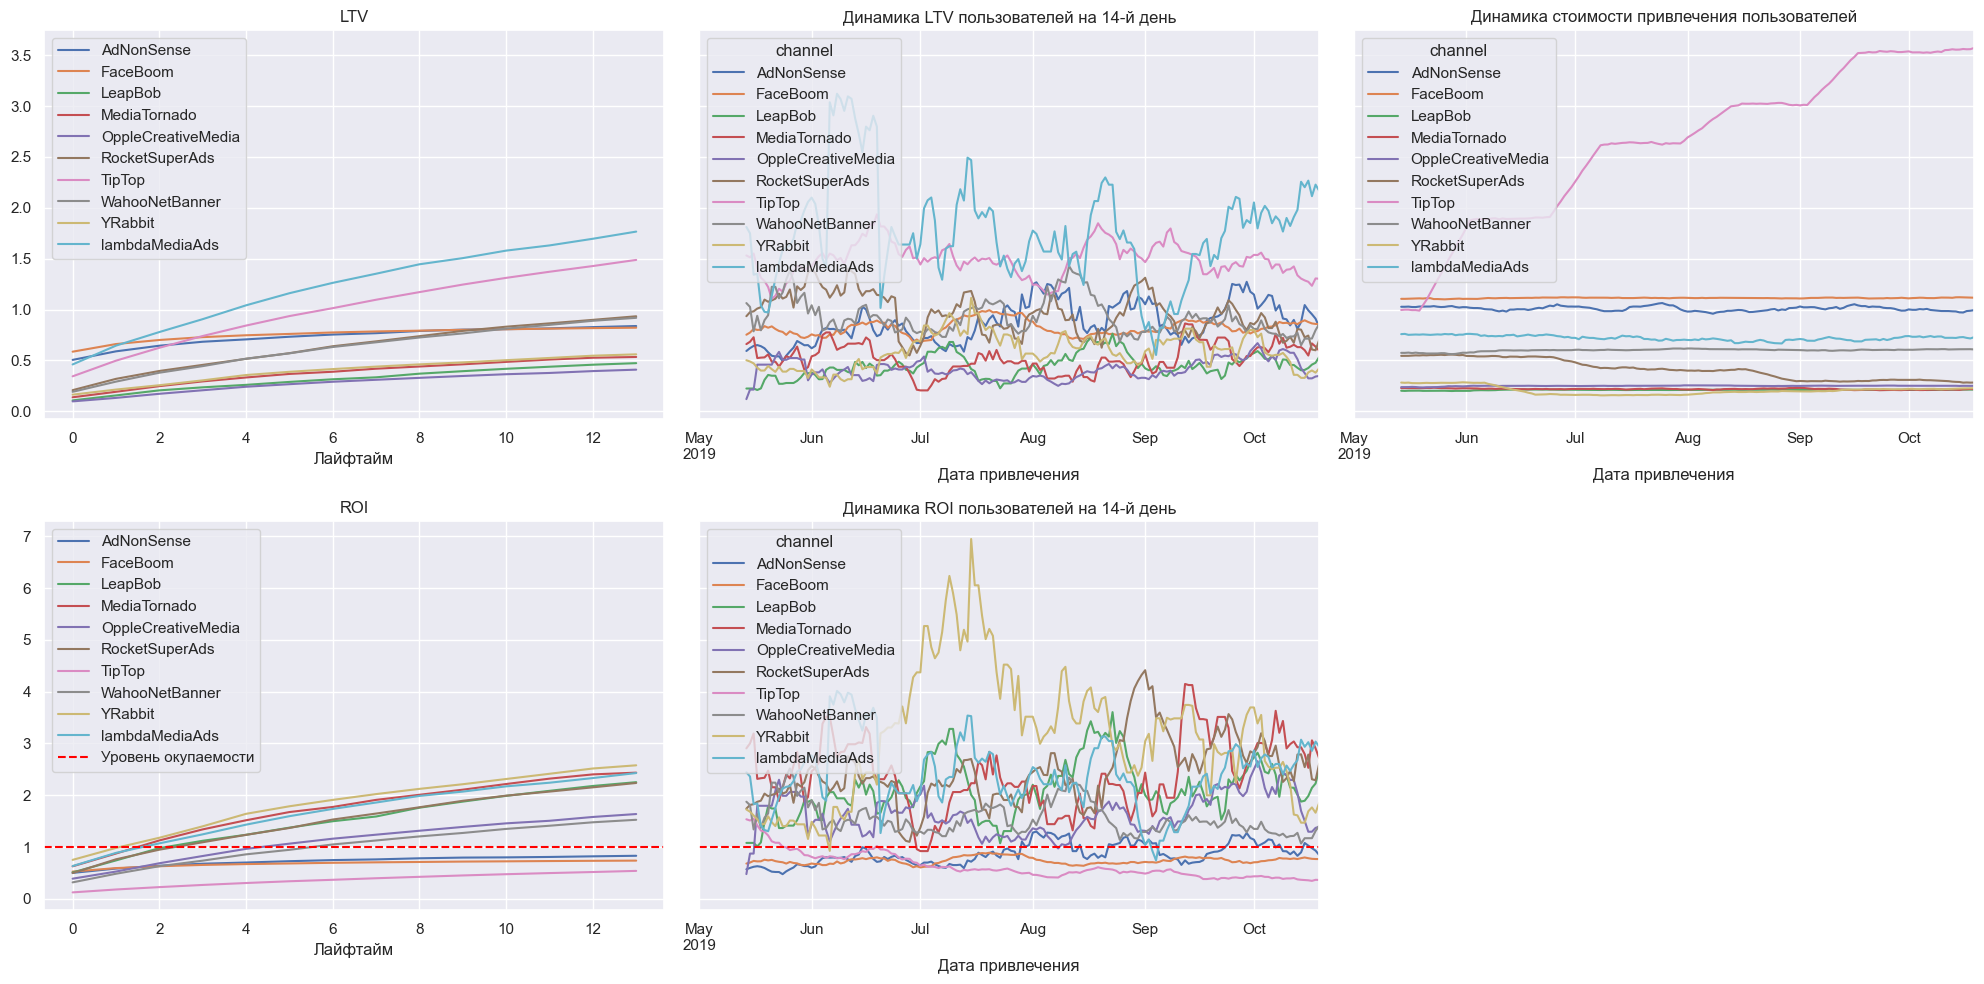

In [74]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

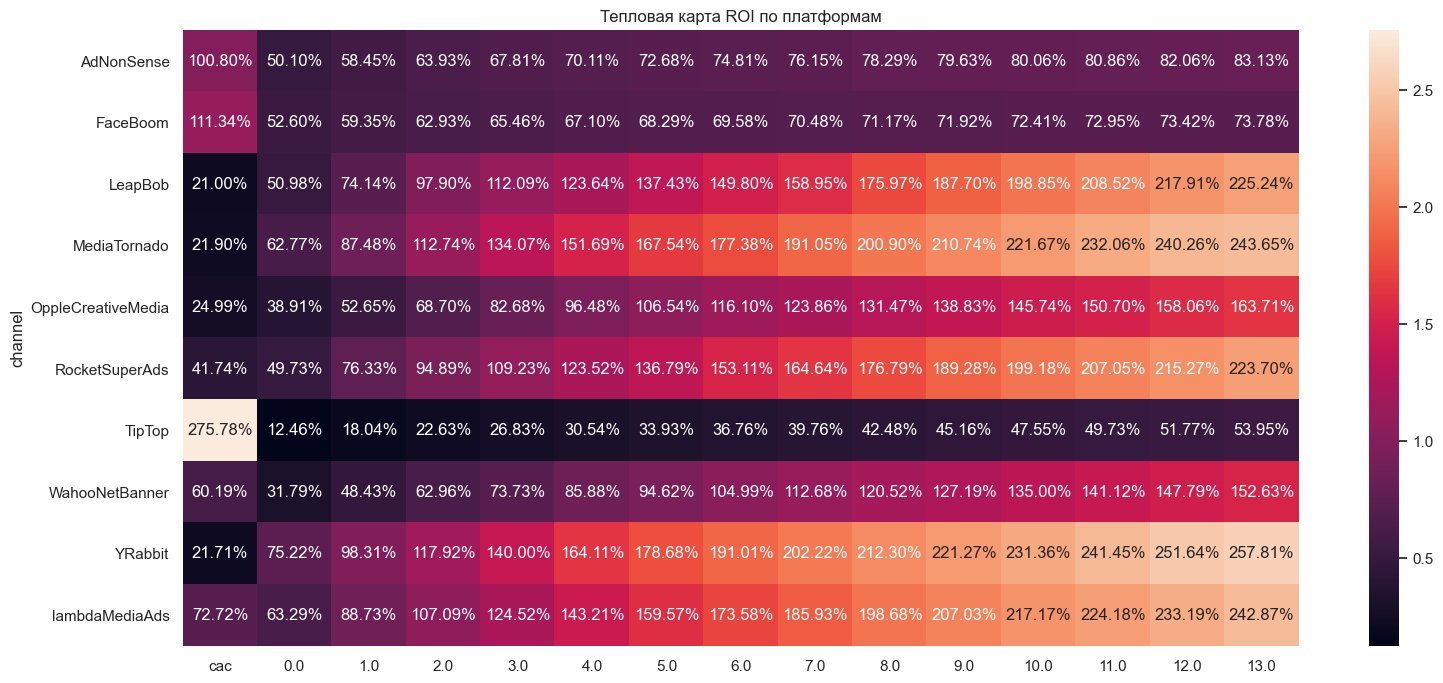

In [75]:
sns.heatmap(roi_grouped.drop(columns=['cohort_size']), annot=True, fmt='.2%')
sns.set(rc = {'figure.figsize':(18,8)})
plt.title('Тепловая карта ROI по платформам')
plt.show(); 

**Вывод:** 
- Стоимость привлечения пользователей в канале TipTop очень резко и сильно растет. Стоимость по другим каналам стабильна
- Реклама с Tiptop окупается хуже всего - всего на 54% к концу второй недели. Очень низкий показатель.
- Так же не окупаются каналы FaceBoom и AdNonSense
- Почти все остальные каналы окупаются более чем на 200% к концу второй недели.

## Выводы и ответы на вопросы:

**Окупается ли реклама, направленная на привлечение пользователей в целом?**

Реклама в целом не окупается. Показатель ROI на уровне 80%

**Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**

- Стоимость привлечения на пользователей с Мак и Айфон увеличивается, но эти пользователи окупаются хуже всего.
- Пользователи с Америки не окупются, а затраты на привлечения сильно увеличиваются. С остальными странами проблем нет, все в порядке
- Последние полгода сильно растет бюджет на рекламу в TipTop. Пользователи с этого канала окупаются только на 54%, что очень плохо.

По всей видимости это одни и те же люди - пользователи из Америки, привлеченный через TipTop

**Чем могут быть вызваны проблемы окупаемости?**

- Сильно возросшие траты на рекламу через TipTop дают плохие результаты. Пользователи оттуда не окупаются и тянут общую окупаемость вниз. 

### Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**Возможные причины**
- Рекламный отдел начал вливать большие суммы на рекламу в TipTop и не анализировал своевременно показатели окупаемости полученных пользователей.

**Рекомендации:**
- Сократить бюджет на рекламу в Tiptop на пользователей из Америки. На данный момент это просто слив бюджете.
- Тестировать другие каналы привлечения. Слегка увеличивать расходы на рекламу в них (если позволяет бюджет) и своевременно отслеживать изменения показателей. А потом на основе анализа принимать решения и делать упор на каналы, которые окупаются.
- На данный момент лучшие показатели окупаемости в каналах: Yrabbit, Media Tornado и lambdaMediaAds - выше 240% к концу второй недели. Возможно тесты стоит начать с них.